  Preparing metadata (setup.py) ... done
  Created wheel for adamp: filename=adamp-0.3.0-py3-none-any.whl size=5981 sha256=c26cfabcdbd0ae75a2b5c29b4dc93c3c13272fa4e5130eb596422e36af96f5ff
  Stored in directory: /root/.cache/pip/wheels/33/f9/d6/b2ed816e1f321f6dcf72a99c954223b1259477095f40434979
Successfully built adamp
사용 장치: cuda


100%|██████████| 170M/170M [00:03<00:00, 43.0MB/s]



--- Adam 학습 시작 ---


Adam Epoch 1/10:   0%|          | 0/391 [00:00<?, ?it/s]

[Adam] Epoch 1: Loss=1.7269, Accuracy=50.06%


Adam Epoch 2/10:   0%|          | 0/391 [00:00<?, ?it/s]

[Adam] Epoch 2: Loss=1.2088, Accuracy=61.83%


Adam Epoch 3/10:   0%|          | 0/391 [00:00<?, ?it/s]

[Adam] Epoch 3: Loss=0.9682, Accuracy=68.35%


Adam Epoch 4/10:   0%|          | 0/391 [00:00<?, ?it/s]

[Adam] Epoch 4: Loss=0.8232, Accuracy=74.21%


Adam Epoch 5/10:   0%|          | 0/391 [00:00<?, ?it/s]

[Adam] Epoch 5: Loss=0.7201, Accuracy=76.74%


Adam Epoch 6/10:   0%|          | 0/391 [00:00<?, ?it/s]

[Adam] Epoch 6: Loss=0.6445, Accuracy=77.16%


Adam Epoch 7/10:   0%|          | 0/391 [00:00<?, ?it/s]

[Adam] Epoch 7: Loss=0.5892, Accuracy=78.44%


Adam Epoch 8/10:   0%|          | 0/391 [00:00<?, ?it/s]

[Adam] Epoch 8: Loss=0.5486, Accuracy=81.35%


Adam Epoch 9/10:   0%|          | 0/391 [00:00<?, ?it/s]

[Adam] Epoch 9: Loss=0.5072, Accuracy=81.46%


Adam Epoch 10/10:   0%|          | 0/391 [00:00<?, ?it/s]

[Adam] Epoch 10: Loss=0.4786, Accuracy=80.89%

--- AdamP 학습 시작 ---


AdamP Epoch 1/10:   0%|          | 0/391 [00:00<?, ?it/s]

[AdamP] Epoch 1: Loss=1.7479, Accuracy=51.09%


AdamP Epoch 2/10:   0%|          | 0/391 [00:00<?, ?it/s]

[AdamP] Epoch 2: Loss=1.2304, Accuracy=61.86%


AdamP Epoch 3/10:   0%|          | 0/391 [00:00<?, ?it/s]

[AdamP] Epoch 3: Loss=0.9994, Accuracy=67.98%


AdamP Epoch 4/10:   0%|          | 0/391 [00:00<?, ?it/s]

[AdamP] Epoch 4: Loss=0.8623, Accuracy=73.18%


AdamP Epoch 5/10:   0%|          | 0/391 [00:00<?, ?it/s]

[AdamP] Epoch 5: Loss=0.7560, Accuracy=76.15%


AdamP Epoch 6/10:   0%|          | 0/391 [00:00<?, ?it/s]

[AdamP] Epoch 6: Loss=0.6888, Accuracy=76.95%


AdamP Epoch 7/10:   0%|          | 0/391 [00:00<?, ?it/s]

[AdamP] Epoch 7: Loss=0.6407, Accuracy=79.03%


AdamP Epoch 8/10:   0%|          | 0/391 [00:00<?, ?it/s]

[AdamP] Epoch 8: Loss=0.5953, Accuracy=78.59%


AdamP Epoch 9/10:   0%|          | 0/391 [00:00<?, ?it/s]

[AdamP] Epoch 9: Loss=0.5563, Accuracy=80.28%


AdamP Epoch 10/10:   0%|          | 0/391 [00:00<?, ?it/s]

[AdamP] Epoch 10: Loss=0.5309, Accuracy=80.53%


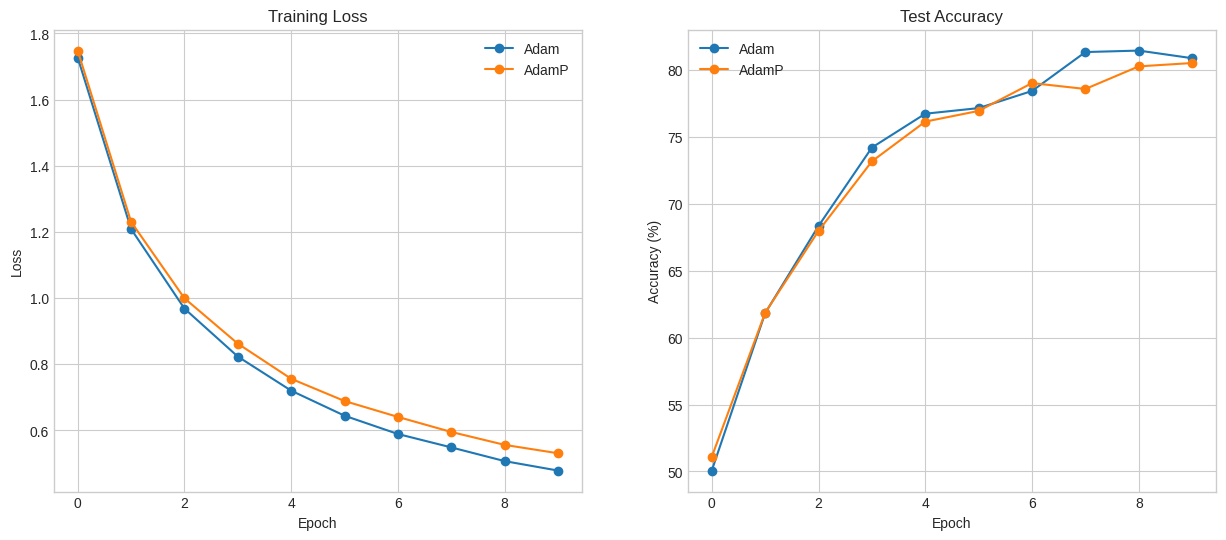

In [1]:
# 필요한 라이브러리
!pip install adamp tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from adamp import AdamP
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# 하이퍼파라미터
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
NUM_EPOCHS = 10

# 🚀 1. GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"사용 장치: {device}")

# 🚀 2. 데이터 증강
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# 🚀 3. 모델 정의
class DeeperCNN(nn.Module):
    def __init__(self):
        super(DeeperCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, 2), # 32→16
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, 2), # 16→8
            nn.Conv2d(128, 256, 3, padding=1), nn.ReLU(),
            nn.Conv2d(256, 256, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, 2)  # 8→4
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256*4*4, 1024), nn.ReLU(),
            nn.Linear(1024, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# 🚀 4. 학습 + 평가 함수 (평균 Loss 기록)
def train_and_evaluate(name, optimizer, model, epochs, train_loader, test_loader):
    criterion = nn.CrossEntropyLoss()
    history = {'train_loss': [], 'test_accuracy': []}

    print(f"\n--- {name} 학습 시작 ---")
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        with tqdm(train_loader, desc=f"{name} Epoch {epoch+1}/{epochs}") as pbar:
            for images, labels in pbar:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                pbar.set_postfix(loss=loss.item())

        avg_loss = running_loss / len(train_loader)
        history['train_loss'].append(avg_loss)

        # 평가
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        acc = 100 * correct / total
        history['test_accuracy'].append(acc)
        print(f"[{name}] Epoch {epoch+1}: Loss={avg_loss:.4f}, Accuracy={acc:.2f}%")

    return history

# 🚀 5. Adam vs AdamP 학습 실행
results = {}

model_adam = DeeperCNN().to(device)
optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=LEARNING_RATE)
results['Adam'] = train_and_evaluate("Adam", optimizer_adam, model_adam, NUM_EPOCHS, train_loader, test_loader)

model_adamp = DeeperCNN().to(device)
optimizer_adamp = AdamP(model_adamp.parameters(), lr=LEARNING_RATE)
results['AdamP'] = train_and_evaluate("AdamP", optimizer_adamp, model_adamp, NUM_EPOCHS, train_loader, test_loader)

# 🚀 6. 시각화
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.plot(results['Adam']['train_loss'], marker='o', label='Adam')
ax1.plot(results['AdamP']['train_loss'], marker='o', label='AdamP')
ax1.set_title('Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(results['Adam']['test_accuracy'], marker='o', label='Adam')
ax2.plot(results['AdamP']['test_accuracy'], marker='o', label='AdamP')
ax2.set_title('Test Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

plt.show()